In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print("Number of training examples:", mnist.train.num_examples)
print("Number of validation examples:", mnist.validation.num_examples)
print("Number of testing examples:", mnist.test.num_examples)

('Number of training examples:', 55000)
('Number of validation examples:', 5000)
('Number of testing examples:', 10000)


In [4]:
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)

((55000, 784), (55000, 10))
((5000, 784), (5000, 10))
((10000, 784), (10000, 10))


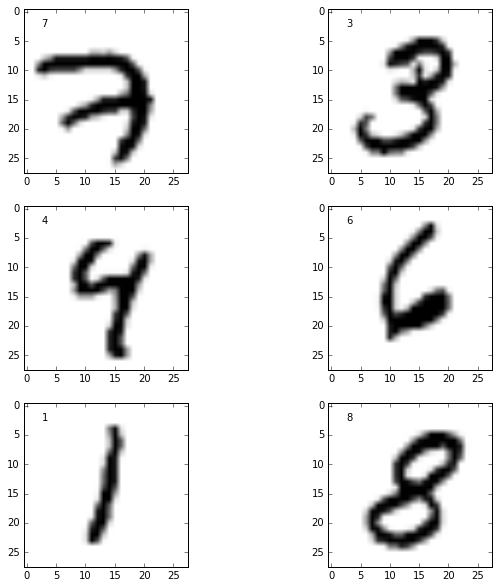

In [5]:
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])

    label = np.argmax(mnist.train.labels[i,:])
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

In [6]:
# A placeholder for the data (inputs and outputs)
x = tf.placeholder(tf.float32, [None, 784])

# W: the weights for each pixel for each class
# b: bias of each class
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [10]:
#define the model

y = tf.nn.softmax(tf.matmul(x,W)+b)

In [14]:
# placeholder for input data
y_ = tf.placeholder(tf.float32, [None, 10])

In [15]:
# A measure of model precision using cross-entropy

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [17]:
# ask TensorFLow to minimize cross_entropy with gradient descent
# with 0.5 as learning rate
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [18]:
init = tf.global_variables_initializer()

# the execution
sess = tf.Session()
sess.run(init)

# run training step 1000 times
for i in range(1000):
    
    # get random 100 data samples from the training set
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    # feed them to the model in place of the placeholders defined above
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [19]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

#this accuracy returns the mean value of an array of 1s and 0s.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# retrun the accuracy on the test set.
print("Accuracy: ", sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

('Accuracy: ', 0.91659999)


(4659, 'incorrect labels out of', 55000)


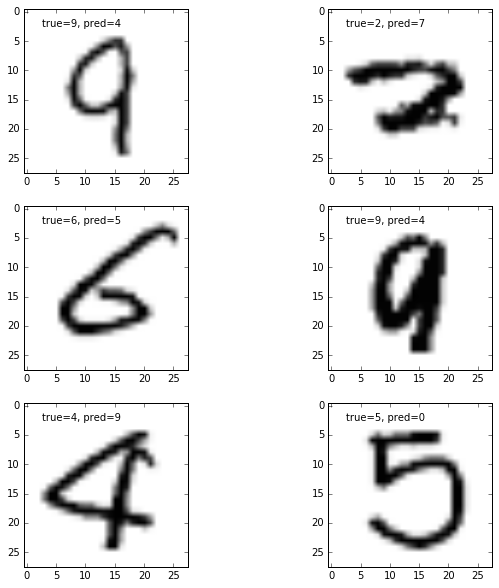

In [20]:
correct_vals = sess.run(correct_prediction, 
                        feed_dict={x: mnist.train.images, y_: mnist.train.labels})
pred_vals = sess.run(y, feed_dict={x: mnist.train.images} )

cntFalse = 0
for cv in correct_vals:
    if cv==False:
        cntFalse+=1
print(cntFalse, "incorrect labels out of",  len(correct_vals))


fig = plt.figure(figsize=(10,10))

cntFalse = 0
for i, cv in enumerate(correct_vals):
    
    if cv==False:
        cntFalse +=1

        ax = fig.add_subplot(3,2,cntFalse)
        im = np.reshape(mnist.train.images[i,:], [28,28])

        label = np.argmax(mnist.train.labels[i,:])
        pred_label = np.argmax(pred_vals[i,:])
        
        ax.imshow(im, cmap='Greys')
        ax.text(left, top, 'true=' + str(label) + ', pred=' + str(pred_label))
        
    if cntFalse==6:
        break